# Download DeepCell sample data

This downloads the [TissueNet sample data](https://deepcell.readthedocs.io/en/master/data-gallery/tissuenet.html) from DeepCell. You need an API key set up already according to the [DeepCell documentation](https://deepcell.readthedocs.io/en/master/API-key.html).

In [59]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import skimage.io as io

In [2]:
from deepcell.datasets import TissueNet

tissuenet = TissueNet(version='1.1')
X_val, y_val, meta_val = tissuenet.load_data(split='val')
X_train, y_train, meta_train = tissuenet.load_data(split='train')
X_test, y_test, meta_test = tissuenet.load_data(split='test')

INFO:root:Checking for cached data
INFO:root:Checking tissuenet_v1-1.zip against provided file_hash...
INFO:root:tissuenet_v1-1.zip with hash cab3b8f242aaee02035557b93546d9dc already available.
INFO:root:Extracting /Users/davidhaley/.deepcell/datasets/tissuenet_v1-1.zip
INFO:root:Successfully extracted /Users/davidhaley/.deepcell/datasets/tissuenet_v1-1.zip into /Users/davidhaley/.deepcell/datasets


In [ ]:
# The DeepCell code doesn't re-download but it does re-extract.
# To avoid re-extracting, do something like this:
# where fpath is: ~/.deepcell/datasets/tissuenet_v1-1/  <one of the npz files>
# data = np.load(fpath, allow_pickle=True)
#        X = data["X"]
#        y = data["y"]

In [43]:
from deepcell.utils.plot_utils import create_rgb_image
from deepcell.utils.plot_utils import make_outline_overlay

selected_X = X_train[0:200]
selected_y = y_train[0:200]

rgb_images = create_rgb_image(selected_X, channel_colors=['green', 'blue'])
overlay_data_cell = make_outline_overlay(rgb_data=rgb_images, predictions=selected_y[:, :, :, 0:1])
overlay_data_nuc = make_outline_overlay(rgb_data=rgb_images, predictions=selected_y[:, :, :, 1:2])

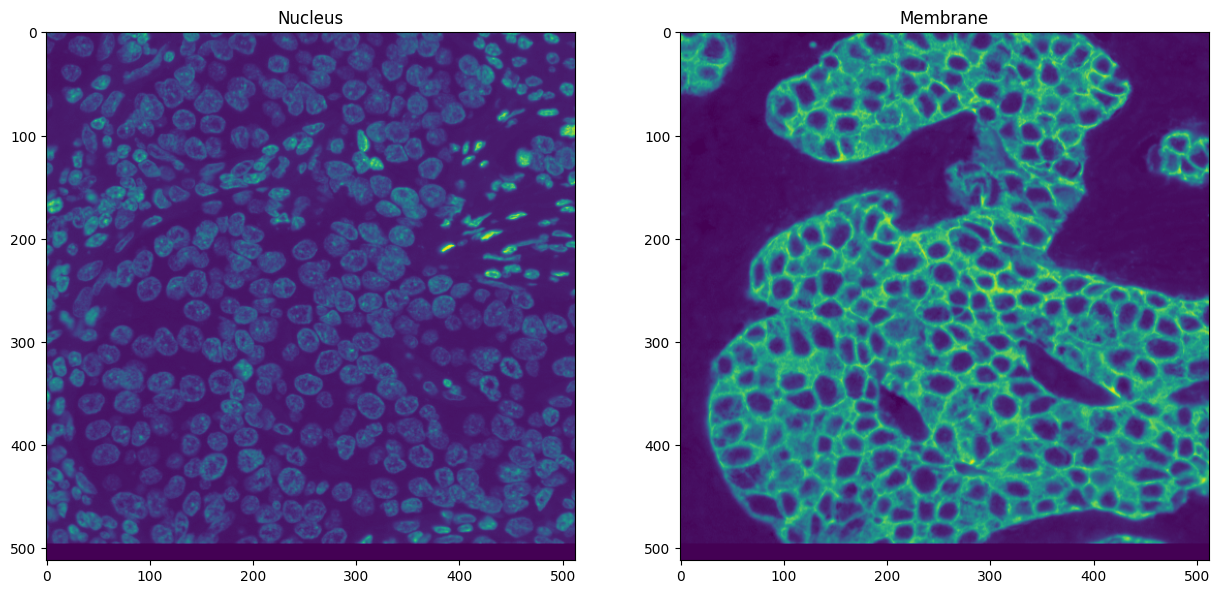

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

selected_index = 194
nucleus = selected_X[selected_index][:, :, 0].copy()
membrane = selected_X[selected_index][:, :, 1].copy()

nucleus_min = np.min(nucleus)
nucleus_max = np.max(nucleus)
membrane_min = np.min(membrane)
membrane_max = np.max(membrane)

# nucleus = np.clip(nucleus, nucleus_min, (nucleus_min+nucleus_max)*0.02)
# membrane = np.clip(membrane, membrane_min, (membrane_min+membrane_max)*0.02)

ax[0].imshow(nucleus)
ax[1].imshow(membrane)
ax[0].set_title('Nucleus')
ax[1].set_title('Membrane')
plt.show()

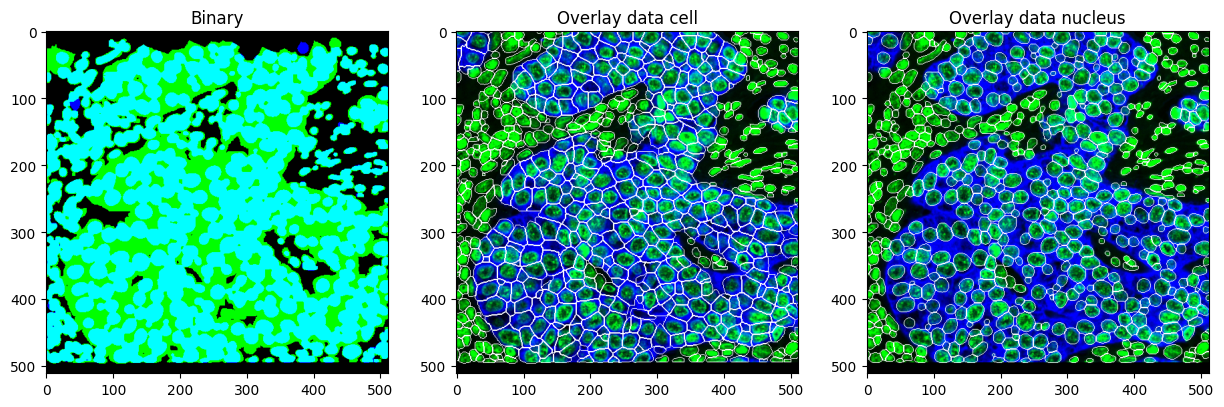

In [49]:
y_rgb_image = create_rgb_image(selected_y, channel_colors=['green', 'blue'])
nonzero_image = y_rgb_image[selected_index].copy()
nonzero_image[np.where(nonzero_image > 0)] = 1

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(nonzero_image)
ax[1].imshow(overlay_data_cell[selected_index])
ax[2].imshow(overlay_data_nuc[selected_index])
ax[0].set_title('Binary')
ax[1].set_title('Overlay data cell')
ax[2].set_title('Overlay data nucleus')
plt.show()


In [50]:
good_samples = [10, 27, 133, 48, 194]

good_X = [selected_X[i] for i in good_samples]
good_y = [selected_y[i] for i in good_samples]
good_X_array = np.array(good_X)
good_y_array = np.array(good_y)

In [57]:
filename = 'selected_training_data.npz'
with open(filename, 'wb') as output_file:
    np.savez_compressed(output_file, X=good_X_array, y=good_y_array)

In [70]:
rgb_images = create_rgb_image(good_X_array, channel_colors=['green', 'blue'])
overlay_data_cell = make_outline_overlay(
    rgb_data=rgb_images,
    predictions=good_y_array[:, :, :, 0:1],
)
overlay_data_nucleus = make_outline_overlay(
    rgb_data=rgb_images,
    predictions=good_y_array[:, :, :, 1:2],
)

for i in range(len(good_X)):
    im = Image.fromarray((rgb_images[i] * 255).astype(np.uint8))
    im.save(f'image_{i}_input.png', mode='RGB')

    im = Image.fromarray((overlay_data_cell[i] * 255).astype(np.uint8))
    im.save(f'image_{i}_prediction_cell.png', mode='RGB')

    im = Image.fromarray((overlay_data_nucleus[i] * 255).astype(np.uint8))
    im.save(f'image_{i}_prediction_nucleus.png', mode='RGB')
    